In [2]:
%matplotlib notebook

In [6]:
# Import dependencies

import numpy as np
import pandas as pd
import json
import ijson
import requests
import matplotlib.pyplot as plt
import datetime

from pprint import pprint
from config import api_keys


In [7]:
# Import data

filename1 = 'Resources/country_population.csv'
filename2 = 'Resources/fertility_rate.csv'
filename3 = 'Resources/life_expectancy.csv'

country_population = pd.read_csv(filename1)
fertility_rate = pd.read_csv(filename2)
life_expectancy = pd.read_csv(filename3)



In [8]:
# Cleaning up life expectancy data frame.
# Transposes dataframe and drops rows that aren't needed for calculations.


life_expectancy_transposed = life_expectancy.transpose()
life_expectancy_transposed.columns = life_expectancy_transposed.iloc[0]
life_expectancy_transposed = life_expectancy_transposed.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
life_expectancy_transposed = life_expectancy_transposed.dropna(axis = 'columns',how = 'any')

life_expectancy_transposed.head()


Country Name,Aruba,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,65.662,32.292,33.251,62.279,46.8251,52.265,65.022,65.971,62.115,70.8171,...,59.253,66.2249,59.041,46.441,52.5717,49.748,34.361,52.215,45.124,51.565
1961,66.074,32.742,33.573,63.298,47.4077,53.312,65.141,66.402,62.555,70.9732,...,59.829,66.488,59.722,47.044,53.0775,50.249,34.471,52.559,45.502,51.938
1962,66.444,33.185,33.914,64.187,47.9889,54.349,65.233,66.837,62.979,70.9424,...,60.395,66.7411,60.391,47.648,53.5016,50.75,34.739,52.894,45.869,52.3
1963,66.787,33.624,34.272,64.911,48.5722,55.375,65.311,67.276,63.385,70.9117,...,60.948,66.9962,61.024,48.251,54.0355,51.252,35.187,53.229,46.225,52.651
1964,67.113,34.06,34.645,65.461,49.1592,56.385,65.388,67.715,63.774,70.881,...,61.488,67.2604,61.585,48.853,54.7152,51.756,35.815,53.571,46.574,52.993


In [9]:
# Life expectancy averages from last 10 years

LE_10years = life_expectancy_transposed.iloc[range(46,57),:]

avg_life_10_years = pd.DataFrame(LE_10years.mean().sort_values(ascending = False))
avg_life_10_years = avg_life_10_years.rename(columns = {0 : 'Avg Life Expectancy (2006-2016)'})
avg_life_10_years = avg_life_10_years.reset_index()

avg_life_10_years.head()

,Country Name,Avg Life Expectancy (2006-2016)
0,"Hong Kong SAR, China",83.277384
1,Japan,83.052417
2,"Macao SAR, China",82.877000
3,Switzerland,82.427051
4,Italy,82.106430


In [10]:
# Set criteria for highest where highest is 80 years and above.
# 26 countries fall under this criteria

top_avg_life_10_years = avg_life_10_years.loc[avg_life_10_years["Avg Life Expectancy (2006-2016)"] > 80]
top_avg_life_10_years = top_avg_life_10_years.drop(index = 14).reset_index(drop = True)  # drops 'euro area' because it's not a country

top_avg_life_10_years

,Country Name,Avg Life Expectancy (2006-2016)
0,"Hong Kong SAR, China",83.277384
1,Japan,83.052417
2,"Macao SAR, China",82.877000
3,Switzerland,82.427051
4,Italy,82.106430
5,Iceland,82.091353
6,Spain,82.076940
7,Australia,81.841685
8,France,81.794235
9,Singapore,81.652328


In [11]:
# Set criteria for lowest life expectancy where lowest is 60 years and below.
# 30 countries fall under this criteria

bot_avg_life_10_years = avg_life_10_years.loc[avg_life_10_years["Avg Life Expectancy (2006-2016)"] < 60]
bot_avg_life_10_years = bot_avg_life_10_years.drop(index = [200,201,203,209,210,211,214]).reset_index(drop = True) # drops regions that aren't countries

bot_avg_life_10_years

,Country Name,Avg Life Expectancy (2006-2016)
0,"Gambia, The",59.842727
1,Liberia,59.817545
2,Benin,59.503273
3,Namibia,59.358091
4,Angola,58.501182
5,Malawi,58.037091
6,Togo,57.890455
7,Burkina Faso,57.529091
8,South Africa,57.387000
9,Uganda,57.375182


# Cleaning up Data for CIA API #

In [98]:
# Makes a list that cleans up the top and bottom country names so that they will be compatible with key names 
# in CIA WorldFactBook API

country_names_top = list(top_avg_life_10_years['Country Name'])

top_country_names = [country.lower().replace(" ","_") for country in country_names_top ]
top_country_names[0] = 'hong_kong'
top_country_names[2] = 'macau'
top_country_names[19] = 'korea_south'

print(top_country_names, '\n')


country_names_bot = list(bot_avg_life_10_years['Country Name'])

bot_country_names = [country.lower().replace(" ","_") for country in country_names_bot ]
bot_country_names[11] = 'congo_democratic_republic_of_the'
bot_country_names[0] = bot_country_names[0].replace(',','')
bot_country_names[26] = "cote_d'_ivoire"

print(bot_country_names)


## Test Runs ##

In [33]:
# JsonFile = 'Resources/weekly_json/2007-06-18_factbook.json'

# dic = {}
# dic2 = {}

# with open(JsonFile, 'r') as f:
#     objects = json.loads(f.read())
# #     country = list(objects['countries'].keys())
#     try:
#         for top, bot in zip(top_country_names,bot_country_names):
#             dic[top] = objects['countries'][top]['data']['economy']['industries']['industries']
#             dic2[bot] = objects['countries'][bot]['data']['economy']['industries']['industries']
        
#     except:
#         print(f'{top} not counted as country')

        
# pprint(dic)
# pprint(dic2)

In [100]:
JsonFile = 'Resources/weekly_json/2007-06-18_factbook.json'

checker = True
dic = {}
dic2 = {}

# get %s of industries

with open(JsonFile, 'r') as f:
    objects = json.loads(f.read())
    
    try:
        for top,bot in zip(top_country_names,bot_country_names):

            
            sectors = objects['countries'][top]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']
            agriculture_value = objects['countries'][top]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']['agriculture']['value']
            industry_value = objects['countries'][top]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']['industry']['value']
            services_value = objects['countries'][top]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']['services']['value']
            
            sectors_bot = objects['countries'][bot]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']
            agriculture_value_bot = objects['countries'][bot]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']['agriculture']['value']
            industry_value_bot = objects['countries'][bot]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']['industry']['value']
            services_value_bot = objects['countries'][bot]['data']['economy']['gdp']['composition']['by_sector_of_origin']['sectors']['services']['value']
            
            dic[top] = sectors
            dic[top]['agriculture'] = agriculture_value
            dic[top]['industry'] = industry_value
            dic[top]['services'] = services_value
            
            dic2[bot] = sectors_bot
            dic2[bot]['agriculture'] = agriculture_value_bot
            dic2[bot]['industry'] = industry_value_bot
            dic2[bot]['services'] = services_value_bot     
            
    except:
        
        checker = False

# 
        
pprint(dic)

pprint(dic2)


{'australia': {'agriculture': 3.8, 'industry': 26.2, 'services': 70},
 'canada': {'agriculture': 2.3, 'industry': 29.2, 'services': 68.5},
 'france': {'agriculture': 2.2, 'industry': 20.6, 'services': 77.2},
 'hong_kong': {'agriculture': 0.1, 'industry': 9, 'services': 90.9},
 'iceland': {'agriculture': 8.4, 'industry': 15.6, 'services': 76},
 'italy': {'agriculture': 2, 'industry': 29.1, 'services': 69},
 'japan': {'agriculture': 1.6, 'industry': 25.3, 'services': 73.1},
 'luxembourg': {'agriculture': 1, 'industry': 13, 'services': 86},
 'macau': {'agriculture': 0.1, 'industry': 7.2, 'services': 92.7},
 'malta': {'agriculture': 3, 'industry': 23, 'services': 74},
 'netherlands': {'agriculture': 2.1, 'industry': 23.9, 'services': 73.9},
 'new_zealand': {'agriculture': 4.3, 'industry': 26.9, 'services': 68.8},
 'norway': {'agriculture': 2.3, 'industry': 41.4, 'services': 56.3},
 'singapore': {'agriculture': 0, 'industry': 33.8, 'services': 66.2},
 'spain': {'agriculture': 3.9, 'industry

In [80]:
q = pd.DataFrame(dic).transpose()

p = pd.DataFrame(dic2).transpose()

p.head()

,agriculture,industry,services
gambia_the,30.5,13.9,55.6
liberia,76.9,5.4,17.7
benin,32.8,13.7,53.5
namibia,11.8,30.2,58.1
angola,9.6,65.8,24.6


In [62]:
#testing to see if df worked

# x = pd.DataFrame.from_dict(dic, orient = 'index').transpose()
# x.head()

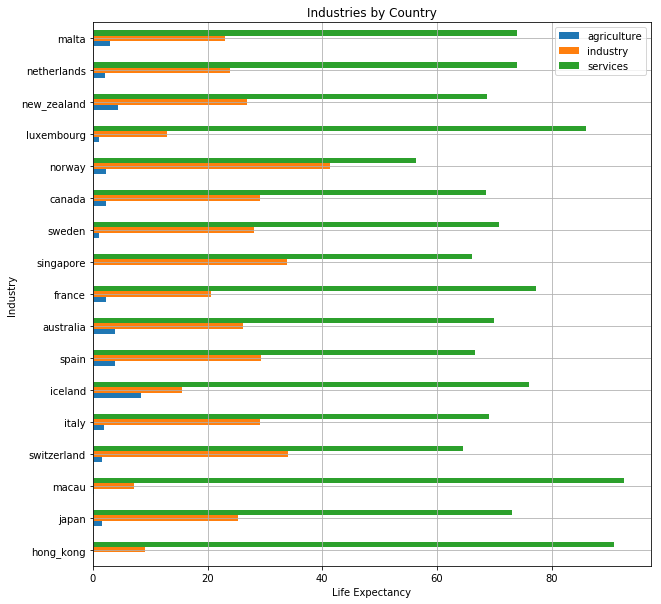

In [81]:
q.plot(kind="barh", figsize=(10,10))

plt.title("Industries by Country")
plt.xlabel("Life Expectancy")
plt.ylabel("Industry")
plt.grid()


plt.show()

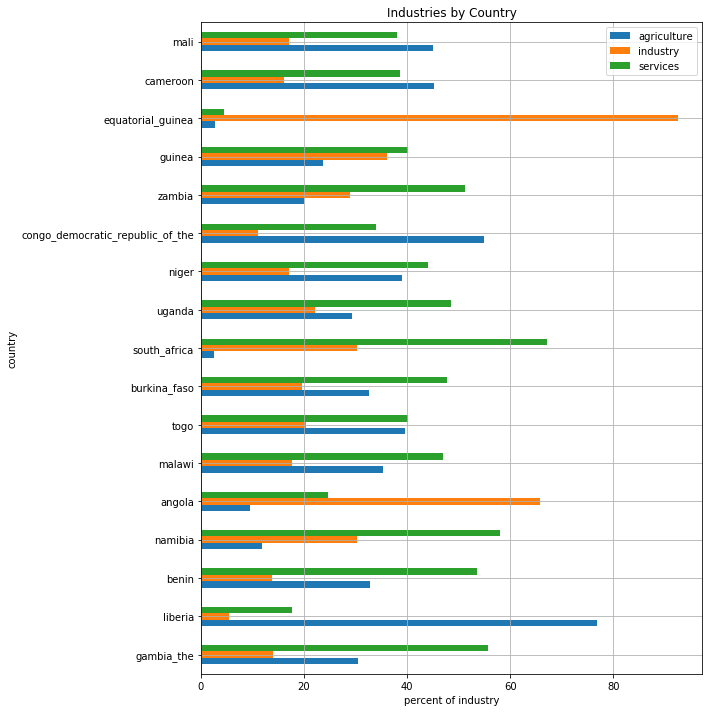

In [82]:
p.plot(kind="barh", figsize=(10,10))

plt.title("Industries by Country")
plt.xlabel("percent of industry")
plt.ylabel("country")
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
# Goes through ALL of the json files that were pulled from CIA Factbook from resources, extracts industry information
# for each country with high and low life expectancy and stores all the info in a list of dataframes.

checker = True

start_date = datetime.datetime.strptime('2007-06-18', '%Y-%m-%d')

end_date = datetime.datetime.strptime('2017-08-30', '%Y-%m-%d')

# print(end_date.strftime('%Y-%m-%d'))


df_top = []
df_bot = []


# while start_date.strftime('%Y-%m-%d') < end_date.strftime('%Y-%m-%d'):
# #     print(f"Resources/weekly_json/{start_date.strftime('%Y-%m-%d')}_factbook.json")
    
#     JsonFile = f"Resources/weekly_json/{start_date.strftime('%Y-%m-%d')}_factbook.json"

#     dic = {}
#     dic2 = {}

#     with open(JsonFile, 'r', errors = 'ignore') as f:
#         objects = json.loads(f.read())
#         try:
#             for top, bot in zip(top_country_names,bot_country_names):
#                 dic[top] = objects['countries'][top]['data']['economy']['industries']['industries']
#                 dic2[bot] = objects['countries'][bot]['data']['economy']['industries']['industries']
#         except:
#             checker = False
            
#         df_top.append(pd.DataFrame.from_dict(dic, orient = 'index').transpose())
#         df_bot.append(pd.DataFrame.from_dict(dic2, orient = 'index').transpose())
#     print(start_date)
#     start_date += datetime.timedelta(days=7)

        

NameError: name 'datetime' is not defined

In [1]:
# print(len(df_top))
# print(len(df_bot))

In [2]:
# df_top[500]

In [27]:
# Average life expectancy from 1960-2016

# avg_life = pd.DataFrame(life_expectancy_transposed.mean().sort_values(ascending = False))
# avg_life = avg_life.rename(columns = {0 : 'Avg Life Expectancy (1960-2016)'})
# avg_life = avg_life.reset_index()

# avg_life.head()


# Placeholder for this cell. Supplementary information. Potentially not needed